# Batch Objects

Batch objects are used for grouping Shape objects or other Batch objects or both. They can also be used for setting styling attributes of multiple objects at once. Applying multiple transformations to a Shape object results in a Batch object containing transformed copies of the target Shape object. But applying multiple transformations to a Batch object does not yield a new Batch object.

### Transforming Shape objects with repetitions yield Batch objects that contain the target Shape as well as the transformed copies of it.

Shape(((0.0, 0.0), (50.0, 50.0)))
2879962805392
Batch([Shape(((0.0, 0.0), (50.0, 50.0))), Shape(((100.0, 0.0), (50.0, 50.0)))])
2879921083216
2879921083216
2879962805392


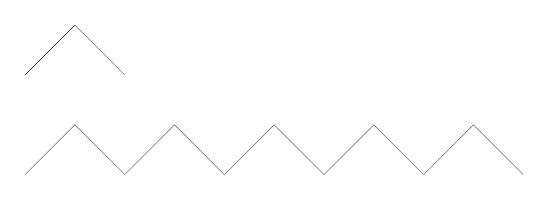

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

points  = [(0, 0), (50, 50)]
segment = sg.Shape(points)
print(segment)
print(id(segment))
canvas.draw(segment)
segments = segment.mirror(segment.right, reps=1)
# segments is the batch returned by the mirror method
print(segments)
print(id(segments))
canvas.draw(segments)
segments.translate(0, -100)
segments.translate(100, 0, reps=4)
# since segments is a batch, transforming it with multiple
# repetitions does not yield a new batch
print(id(segments)) # same object as before translation
print(id(segments[0])) # this is the same object as before translation
canvas.draw(segments)
canvas.display()

### Batch objects can be used to group multiple objects. 

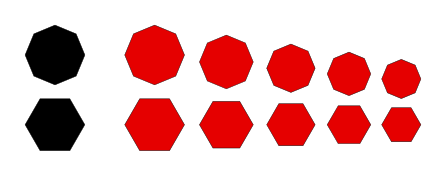

In [22]:
import simetri.graphics as sg

canvas = sg.Canvas()

hex = sg.reg_poly_shape((0, 0), 6, 30)
oct = sg.reg_poly_shape((0, 70), 8, 30)

polygons = sg.Batch([hex, oct])
canvas.draw(polygons)
canvas.translate(100, 0)
# Now we can transform all shapes in the batch at once
scale = sg.scale_matrix(.9, .9)
translate = sg.translation_matrix(80, 0)
transform = translate @ scale
polygons.transform(transform, reps=4)
# We can change attributes of all shapes in the batch at once
polygons.set_attribs('fill_color', sg.red)
canvas.draw(polygons)

canvas.display()

### Batches behave similar to Python lists, but they are not lists.

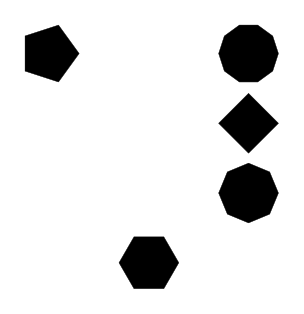

In [29]:
import simetri.graphics as sg

canvas = sg.Canvas()

hex = sg.reg_poly_shape((0, 0), 6, 30)
oct = sg.reg_poly_shape((0, 70), 8, 30)
sqr = sg.reg_poly_shape((0, 140), 4, 30)
pent = sg.reg_poly_shape((0, 210), 5, 30)
deca = sg.reg_poly_shape((200, 210), 10, 30)

batch1 = sg.Batch([hex, oct])
batch2 = sg.Batch([sqr, pent])

all_polygons = batch1 + batch2
all_polygons[0].translate(100, 0)

batch3 = sg.Batch(all_polygons[1:3])
# now the sqr and hex are in two different batches
batch3.translate(200, 0)
all_polygons.append(deca)

canvas.draw(all_polygons)

canvas.display()

### Batches can be created empty and they can contain other batches.

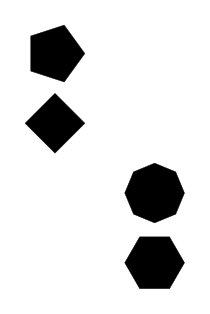

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

hex = sg.reg_poly_shape((0, 0), 6, 30)
oct = sg.reg_poly_shape((0, 70), 8, 30)
sqr = sg.reg_poly_shape((0, 140), 4, 30)
pent = sg.reg_poly_shape((0, 210), 5, 30)
deca = sg.reg_poly_shape((200, 210), 10, 30)

batch1 = sg.Batch() # empty batch
batch1.extend([hex, oct])
batch2 = sg.Batch([sqr, pent])

all_polygons = sg.Batch([batch1, batch2]) # a batch of batches
all_polygons[0].translate(100, 0) # translate the first batch

canvas.draw(all_polygons)

canvas.display()